## Lab 9

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from apyori import apriori

In [4]:
df = pd.read_csv("DataSets\\Groceries_dataset.csv",parse_dates = ['Date'])
df.head()

C:\Users\UAZS8\AppData\Local\Temp\ipykernel_20420\4130370430.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv("DataSets\\Groceries_dataset.csv",parse_dates = ['Date'])


,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-01-05,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-02-01,whole milk


In [6]:
transactions = df.groupby(['Member_number', 'Date'])
transactions.count()

itemDescription
Member_number Date                       
1000          2014-06-24                3
              2015-03-15                4
              2015-05-27                2
              2015-07-24                2
              2015-11-25                2
...                                   ...
4999          2015-05-16                2
              2015-12-26                2
5000          2014-03-09                2
              2014-11-16                2
              2015-02-10                3

[14963 rows x 1 columns]

In [5]:
support = (df['itemDescription'].value_counts()/14963*100)
support.head()

itemDescription
whole milk          16.721246
other vegetables    12.684622
rolls/buns          11.468288
soda                10.118292
yogurt               8.915324
Name: count, dtype: float64

In [6]:
list_transactions = [i[1]['itemDescription'].tolist() for i in list(transactions)]
list_transactions[:10]

[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['beef', 'white bread'],
 ['frankfurter', 'curd']]

In [7]:
rules = apriori(list_transactions, min_support = 0.001, min_confidence = 0.05, min_lift = 1.2, max_length = 2)
#min_support: Это минимальное значение поддержки для ассоциативных правил. Поддержка (support) определяет, насколько часто
#заданная комбинация элементов встречается в транзакциях. Минимальное значение указывает, какие комбинации будут рассматриваться как значимые.

#min_confidence: Это минимальное значение уверенности для ассоциативных правил.
#Уверенность (confidence) отражает вероятность того, что правило сработает. Это отношение числа транзакций,
#в которых присутствуют все элементы правила, ко всем транзакциям, в которых присутствует первый элемент.

#min_lift: Это минимальное значение "lift" для ассоциативных правил.
#Lift отражает степень, на которую комбинация элементов связана между собой, с учётом их встречаемости отдельно.
#Значение lift больше 1 указывает на положительную связь, меньше 1 - на отрицательную, а равное 1 - на отсутствие связи.

#max_length: Максимальная длина ассоциативных правил. Определяет максимальное количество элементов в правиле.
results = list(rules)

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
final_df = pd.DataFrame(columns = ['Left Hand Side', 'Right Hand Side', 'Support(%)', 'Confidence(%)', 'Lift'])
for i in results:
    if len(i[0]) > 1:
        for j in range(0, len(i[2])):
            LHS = list(i[2][j][0])[0]
            RHS = list(i[2][j][1])[0]
            SUPPORT = i[1]*100
            CONFIDENCE = i[2][j][2]*100
            LIFT = i[2][j][3]
            new_row = {'Left Hand Side': LHS, 'Right Hand Side': RHS, 'Support(%)': SUPPORT, 'Confidence(%)': CONFIDENCE, 'Lift': LIFT}
            final_df = final_df.append(new_row, ignore_index = True)
final_df['Rules'] = final_df['Left Hand Side'] + ' -> ' + final_df['Right Hand Side']
print('Number of Rules: ', final_df['Rules'].count(), 'Rules')
final_df.head()

Number of Rules:  30 Rules


<ipython-input-11-9bedc9e675fa>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(new_row, ignore_index = True)
<ipython-input-11-9bedc9e675fa>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(new_row, ignore_index = True)
<ipython-input-11-9bedc9e675fa>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(new_row, ignore_index = True)
<ipython-input-11-9bedc9e675fa>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(new_row, ignore_index = True)
<ipython-input-11-9bedc9e675fa>:12: FutureWarning: The frame.append method is deprecated

,Left Hand Side,Right Hand Side,Support(%),Confidence(%),Lift,Rules
0,beverages,sausage,0.15,9.27,1.54,beverages -> sausage
1,bottled beer,sausage,0.33,7.37,1.22,bottled beer -> sausage
2,sausage,bottled beer,0.33,5.54,1.22,sausage -> bottled beer
3,sugar,bottled water,0.15,8.30,1.37,sugar -> bottled water
4,brown bread,canned beer,0.24,6.39,1.36,brown bread -> canned beer


Text(0.5, 1.0, 'Scatter Plot of Rules By Support, Confidence and Lift')

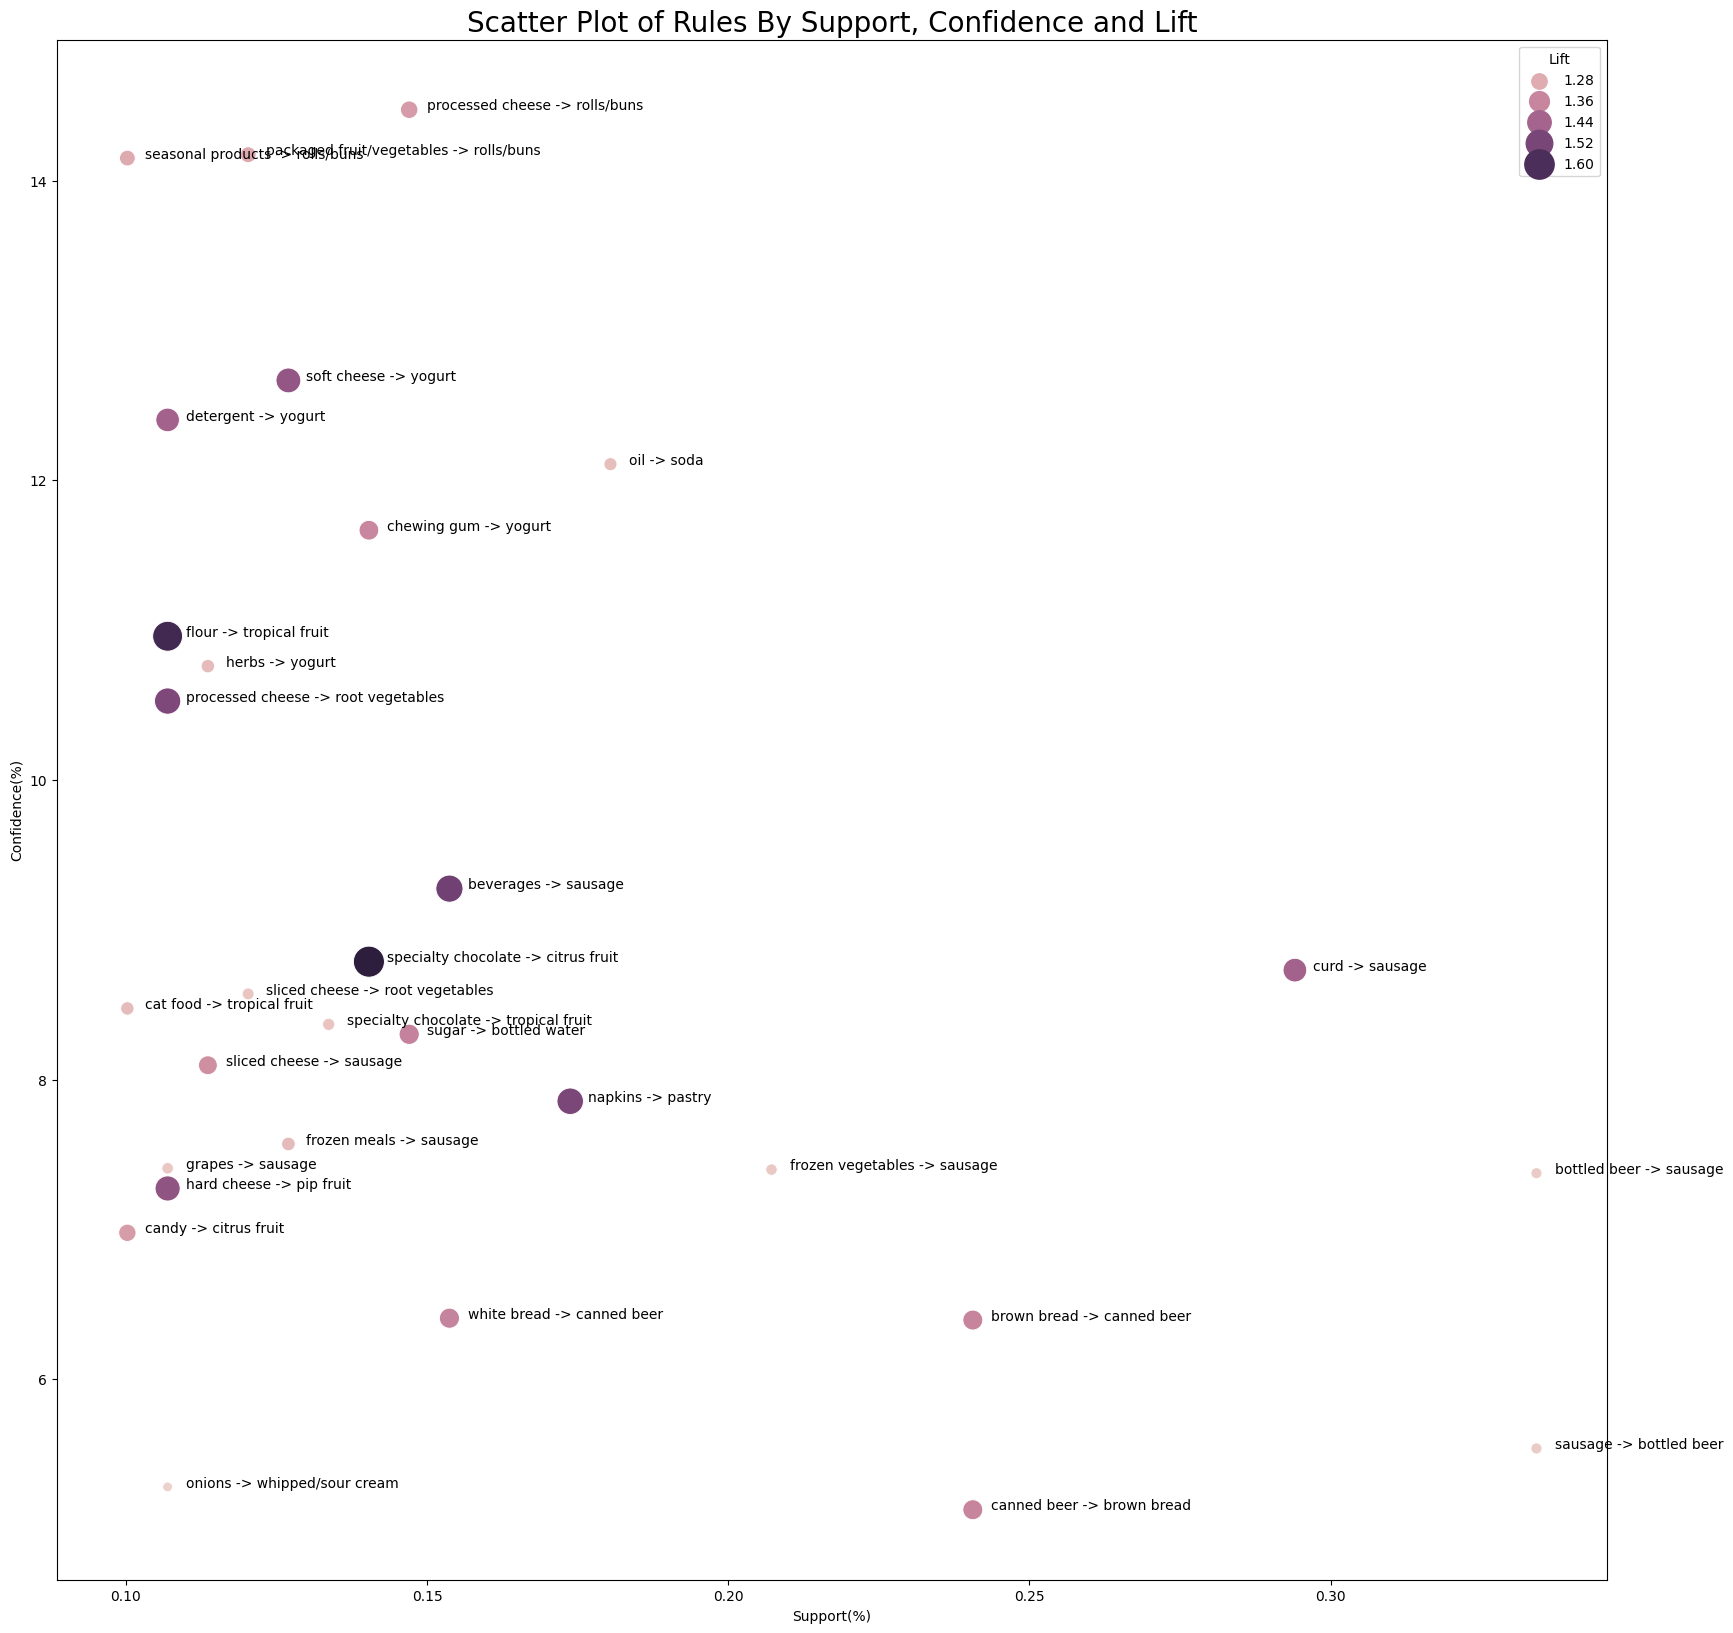

In [ ]:
plt.figure(figsize = (20,20))
support = final_df['Support(%)']
confidence = final_df['Confidence(%)']
rule = final_df['Rules']
ax = sns.scatterplot(data = final_df, x = 'Support(%)', y = 'Confidence(%)', hue = 'Lift', size = 'Lift', sizes = (50,500))
for i,j in enumerate(rule):
    plt.annotate(j, (support[i] + 0.003, confidence[i] ))

plt.title('Scatter Plot of Rules By Support, Confidence and Lift', fontsize = 20)